In [110]:
import torch
import torchvision
import matplotlib.pyplot as plt
%matplotlib inline
from torchvision.datasets import MNIST
import torchvision.transforms as transforms
from torch.utils.data import random_split
from torch.utils.data import DataLoader

In [111]:
# Download training dataset
dataset = MNIST (root = 'Data1/', download=True)

In [112]:
len(dataset)

60000

In [113]:
test_dataset = MNIST(root='Data1/', train=False)
len(test_dataset)

10000

In [114]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28>, 5)

label: 5


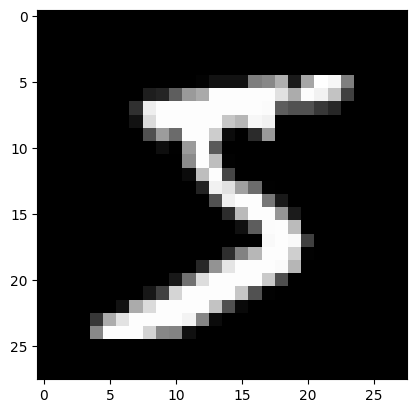

In [115]:
image, label = dataset[0]
plt.imshow(image, cmap='gray')
print('label:', label)

label: 3


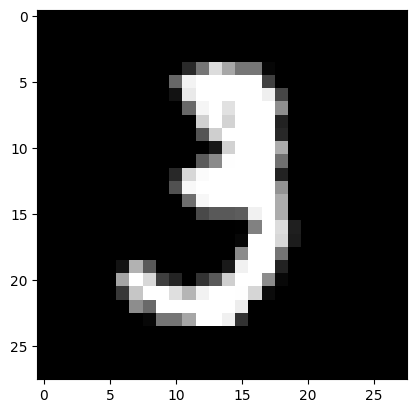

In [116]:
image, label = dataset[10]
plt.imshow(image, cmap='gray')
print('label:', label)

In [117]:
# MNIST dataset (image and labels)
dataset = MNIST(root='Data1/', train= True,
                transform=transforms.ToTensor())

In [118]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


In [119]:
print(img_tensor[:,10:15,10:15])
print(torch.max(img_tensor), torch.min(img_tensor))

tensor([[[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
         [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
         [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
         [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
         [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]]])
tensor(1.) tensor(0.)


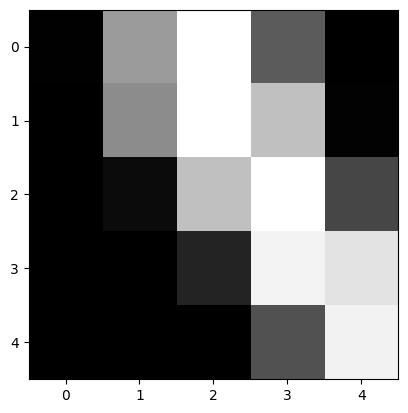

In [120]:
# plot the image 
plt.imshow(img_tensor[0,10:15,10:15], cmap='gray')

In [121]:
train_ds, val_ds = random_split(dataset, [50000, 10000])
print(len(train_ds), len(val_ds))

50000 10000


In [122]:
batch_size = 128
train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

In [123]:
import torch.nn as nn
input_size = 28*28
num_classes = 10
model = nn.Linear(input_size, num_classes)

In [124]:
print(model.weight.shape)
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[-0.0154, -0.0042, -0.0067,  ..., -0.0254, -0.0182, -0.0046],
        [ 0.0087, -0.0066,  0.0252,  ..., -0.0006, -0.0211, -0.0199],
        [ 0.0228,  0.0232,  0.0349,  ...,  0.0236, -0.0337,  0.0002],
        ...,
        [-0.0228,  0.0194,  0.0266,  ..., -0.0166,  0.0019, -0.0231],
        [-0.0146,  0.0322, -0.0284,  ...,  0.0280, -0.0233,  0.0129],
        [-0.0322,  0.0328,  0.0100,  ...,  0.0321,  0.0133,  0.0158]],
       requires_grad=True)

In [125]:
print(model.bias.shape)
model.bias

torch.Size([10])


Parameter containing:
tensor([-0.0281,  0.0259, -0.0066, -0.0118, -0.0175, -0.0201,  0.0101, -0.0186,
        -0.0059,  0.0205], requires_grad=True)

In [126]:
for images, labels in train_loader:
    print(labels)
    print(images.shape)
    outputs = model(images.reshape(128, 784))
    print(outputs)
    break

tensor([0, 7, 0, 3, 0, 7, 2, 7, 6, 5, 9, 6, 9, 2, 7, 3, 7, 4, 9, 9, 5, 4, 1, 8,
        3, 8, 5, 2, 6, 9, 1, 4, 6, 4, 0, 2, 9, 7, 8, 5, 6, 1, 2, 4, 8, 2, 0, 4,
        3, 4, 0, 4, 2, 0, 8, 8, 7, 9, 7, 8, 2, 0, 9, 7, 4, 1, 7, 9, 2, 8, 1, 1,
        5, 1, 9, 1, 4, 8, 2, 0, 0, 0, 7, 6, 0, 2, 7, 4, 0, 3, 1, 2, 3, 5, 0, 5,
        5, 9, 9, 4, 6, 9, 5, 0, 1, 2, 7, 3, 6, 3, 1, 4, 0, 2, 5, 6, 7, 0, 1, 7,
        8, 1, 6, 1, 3, 1, 1, 4])
torch.Size([128, 1, 28, 28])
tensor([[ 0.1390, -0.1649, -0.2148,  ..., -0.0274,  0.1048, -0.1441],
        [ 0.0793,  0.1535, -0.0788,  ...,  0.2232,  0.1287, -0.2295],
        [ 0.1374, -0.1410, -0.4852,  ..., -0.0950, -0.0115, -0.2459],
        ...,
        [-0.1480,  0.0434, -0.0208,  ...,  0.0483,  0.0023,  0.0630],
        [-0.1540, -0.0165,  0.0333,  ...,  0.1693,  0.0399,  0.1715],
        [ 0.3477, -0.0073, -0.1139,  ...,  0.0017, -0.0501, -0.2544]],
       grad_fn=<AddmmBackward0>)


In [127]:
images.shape

torch.Size([128, 1, 28, 28])

In [128]:
images.reshape(128, 784).shape

torch.Size([128, 784])

In [129]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
model = MnistModel()    

In [130]:
model.linear

Linear(in_features=784, out_features=10, bias=True)

In [131]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[-0.0071, -0.0193,  0.0141,  ...,  0.0246, -0.0147, -0.0153],
         [-0.0056,  0.0239,  0.0132,  ...,  0.0149,  0.0069, -0.0319],
         [-0.0354,  0.0330,  0.0089,  ..., -0.0305,  0.0302, -0.0199],
         ...,
         [-0.0340, -0.0224,  0.0230,  ..., -0.0106,  0.0083,  0.0345],
         [-0.0281,  0.0221, -0.0257,  ...,  0.0036,  0.0176, -0.0241],
         [ 0.0028, -0.0343,  0.0062,  ...,  0.0286,  0.0207, -0.0132]],
        requires_grad=True),
 Parameter containing:
 tensor([ 0.0126,  0.0092, -0.0107,  0.0188, -0.0060,  0.0295,  0.0197,  0.0134,
          0.0353,  0.0036], requires_grad=True)]

In [132]:
for images, labels in train_loader:
    print(images.size())
    outputs = model(images)
    break

print("Outputs.shape", outputs.shape)
print("Sample outputs:", outputs[:2].data)

torch.Size([128, 1, 28, 28])
Outputs.shape torch.Size([128, 10])
Sample outputs: tensor([[ 0.2109,  0.1110,  0.1293, -0.2567,  0.2862,  0.4481,  0.1707, -0.2430,
         -0.0194, -0.0370],
        [ 0.2099,  0.2218,  0.1751,  0.1612,  0.0478,  0.0923,  0.1749, -0.3470,
          0.0346, -0.0895]])


In [133]:
import torch.nn.functional as F
outputs[:2]

tensor([[ 0.2109,  0.1110,  0.1293, -0.2567,  0.2862,  0.4481,  0.1707, -0.2430,
         -0.0194, -0.0370],
        [ 0.2099,  0.2218,  0.1751,  0.1612,  0.0478,  0.0923,  0.1749, -0.3470,
          0.0346, -0.0895]], grad_fn=<SliceBackward0>)

In [134]:
# Apply softmax for each output row
probs = F.softmax(outputs, dim=1)
# Look at sample probablities
print("Sample probablities:\n", probs[:2].data)
print("Sum", torch.sum(probs[0]).item())


Sample probablities:
 tensor([[0.1115, 0.1009, 0.1028, 0.0698, 0.1202, 0.1413, 0.1071, 0.0708, 0.0886,
         0.0870],
        [0.1138, 0.1151, 0.1099, 0.1084, 0.0968, 0.1012, 0.1099, 0.0652, 0.0955,
         0.0843]])
Sum 1.0


In [135]:
max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)

tensor([5, 1, 0, 6, 0, 6, 0, 4, 1, 1, 5, 6, 6, 1, 0, 6, 0, 2, 0, 0, 0, 5, 9, 2,
        5, 2, 0, 1, 1, 9, 5, 9, 0, 0, 2, 6, 6, 1, 4, 9, 6, 2, 1, 4, 6, 0, 0, 1,
        6, 0, 0, 6, 6, 5, 0, 2, 5, 1, 2, 0, 5, 1, 6, 0, 5, 0, 1, 1, 0, 1, 4, 0,
        0, 0, 0, 0, 0, 0, 8, 4, 2, 6, 5, 2, 2, 2, 1, 0, 6, 0, 5, 5, 0, 6, 0, 0,
        0, 5, 0, 1, 4, 5, 1, 0, 0, 6, 0, 0, 6, 1, 2, 0, 9, 2, 1, 6, 6, 5, 1, 0,
        0, 6, 4, 0, 9, 0, 0, 0])
tensor([0.1413, 0.1151, 0.1481, 0.1460, 0.1378, 0.1237, 0.1781, 0.1177, 0.1360,
        0.1189, 0.1345, 0.1389, 0.1233, 0.1345, 0.1183, 0.1567, 0.1139, 0.1350,
        0.1356, 0.1360, 0.1252, 0.1133, 0.1181, 0.1275, 0.1281, 0.1204, 0.1391,
        0.1196, 0.1379, 0.1275, 0.1208, 0.1380, 0.1321, 0.1282, 0.1168, 0.1179,
        0.1217, 0.1423, 0.1255, 0.1329, 0.1263, 0.1522, 0.1388, 0.1228, 0.1235,
        0.1522, 0.1491, 0.1363, 0.1366, 0.1281, 0.1210, 0.1371, 0.1481, 0.1358,
        0.1338, 0.1388, 0.1266, 0.1242, 0.1270, 0.1225, 0.1224, 0.1290, 0.1515,
       

In [136]:
labels

tensor([7, 5, 0, 9, 0, 1, 3, 6, 9, 5, 1, 0, 1, 9, 7, 6, 7, 7, 3, 8, 6, 7, 1, 7,
        7, 2, 3, 0, 9, 6, 9, 3, 9, 3, 4, 1, 0, 5, 8, 2, 4, 4, 9, 6, 1, 4, 8, 2,
        9, 6, 9, 2, 0, 7, 0, 2, 7, 8, 5, 7, 2, 7, 0, 8, 9, 2, 4, 4, 9, 0, 2, 3,
        8, 1, 4, 9, 0, 8, 6, 6, 7, 0, 9, 2, 6, 2, 0, 4, 9, 7, 1, 1, 3, 1, 3, 5,
        8, 1, 3, 8, 4, 9, 0, 1, 7, 1, 9, 8, 1, 5, 7, 8, 1, 3, 2, 2, 0, 3, 4, 2,
        9, 0, 9, 9, 2, 4, 6, 8])

In [137]:
# Total number of images true for predicted and labels
torch.sum(preds == labels)

tensor(10)

<!-- Evaluation Matric Loss Function -->

In [138]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item()/ len(preds))

In [139]:
accuracy(outputs, labels)

tensor(0.0781)

In [140]:
loss_fn = F.cross_entropy

In [141]:
loss= loss_fn(outputs, labels)
print(loss)

tensor(2.3094, grad_fn=<NllLossBackward0>)


Training the model

In [142]:
def fit(epochs, lr,model, train_loader,val_loader ,opt_func= torch.optim.SGD):
    optimizer = opt_func(model.parameters(), lr)
    history = []  #For recording epoch
    for epoch in range(epochs):
        # Training phase
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)

    return history    

In [143]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

In [147]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out 

    def training_step(self, batch):
        images, labels = batch
        out = self(images)                  # Generate prediction
        loss = F.cross_entropy(out , labels) #Calculate loss
        return loss

    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate prediction
        loss = F.cross_entropy(out, labels) # Calculate loss
        acc = accuracy(out, labels)         # Calculate accuracy
        return {'val_loss':loss, 'val_acc':acc}
    
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()
        return {'val_loss':epoch_loss.item(), 'val_acc':epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch[{}], val_los: {:.4f}, val_acc:{:.4f}".format(epoch, result['val_loss'], result['val_acc']))
model = MnistModel()      
      

In [148]:
result0 = evaluate(model,val_loader)
print(result0)

{'val_loss': 2.34566593170166, 'val_acc': 0.07535601407289505}


In [149]:
history1 = fit(5, 0.001,model, train_loader, val_loader)

Epoch[0], val_los: 1.9665, val_acc:0.6092
Epoch[1], val_los: 1.6932, val_acc:0.7220
Epoch[2], val_los: 1.4887, val_acc:0.7632
Epoch[3], val_los: 1.3339, val_acc:0.7843
Epoch[4], val_los: 1.2149, val_acc:0.7989


In [150]:
history2 = fit(5, 0.001,model, train_loader, val_loader)

Epoch[0], val_los: 1.1216, val_acc:0.8093
Epoch[1], val_los: 1.0468, val_acc:0.8172
Epoch[2], val_los: 0.9857, val_acc:0.8230
Epoch[3], val_los: 0.9350, val_acc:0.8269
Epoch[4], val_los: 0.8923, val_acc:0.8306


In [151]:
history3 = fit(5, 0.001,model, train_loader, val_loader)

Epoch[0], val_los: 0.8557, val_acc:0.8330
Epoch[1], val_los: 0.8241, val_acc:0.8357
Epoch[2], val_los: 0.7965, val_acc:0.8383
Epoch[3], val_los: 0.7721, val_acc:0.8418
Epoch[4], val_los: 0.7504, val_acc:0.8442


In [152]:
history4 = fit(5, 0.001,model, train_loader, val_loader)

Epoch[0], val_los: 0.7310, val_acc:0.8454
Epoch[1], val_los: 0.7135, val_acc:0.8472
Epoch[2], val_los: 0.6976, val_acc:0.8490
Epoch[3], val_los: 0.6832, val_acc:0.8511
Epoch[4], val_los: 0.6699, val_acc:0.8520


Text(0.5, 1.0, 'Accuracy vs. No. of epoch')

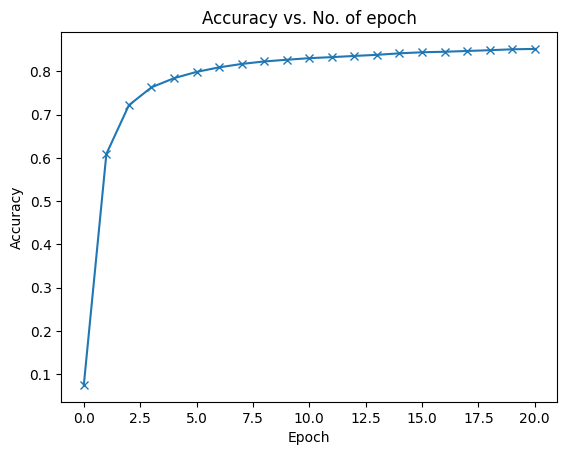

In [154]:
history = [result0] + history1+history2+history3+history4
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. No. of epoch') 

Testing with individual images


In [155]:
test_dataset = MNIST(root='Data1/', train=False, 
                    transform=transforms.ToTensor())

Shape: torch.Size([1, 28, 28])
Label: 7


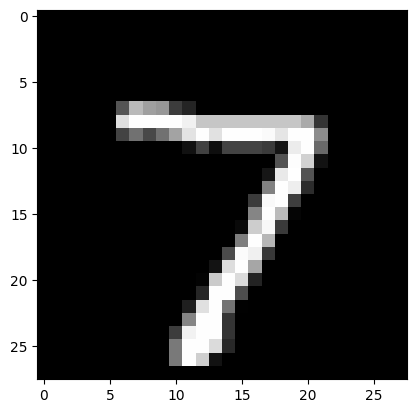

In [159]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap = 'gray')
print('Shape:', img.shape)
print('Label:', label)

In [161]:
img.unsqueeze(0).shape

torch.Size([1, 1, 28, 28])

In [162]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds = torch.max(yb, dim=1)
    return preds[0].item()

Label: 7 Predicted: 7


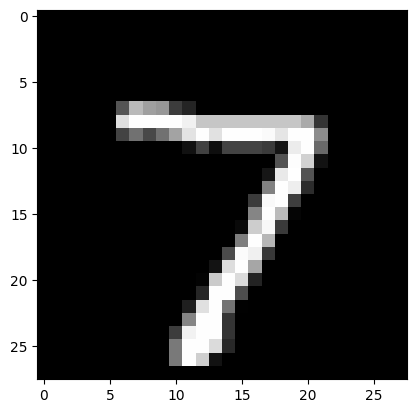

In [163]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Label:', label, 'Predicted:',predict_image(img, model))

Label: 0 Predicted: 0


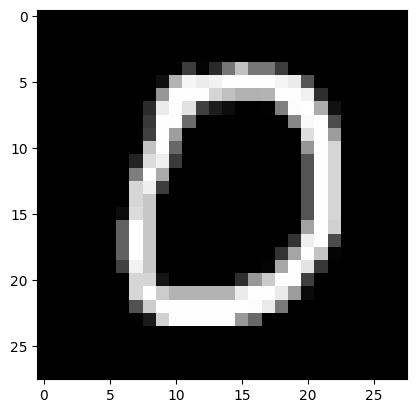

In [164]:
img, label = test_dataset[10]
plt.imshow(img[0], cmap='gray')
print('Label:', label, 'Predicted:',predict_image(img, model))

Label: 9 Predicted: 4


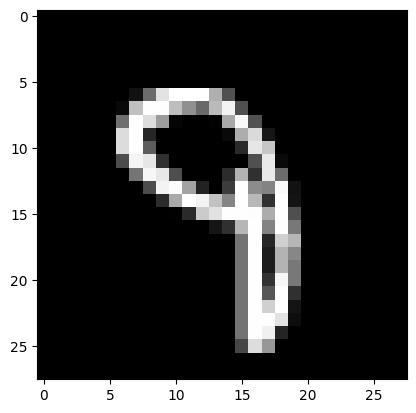

In [166]:
img, label = test_dataset[193]
plt.imshow(img[0], cmap='gray')
print('Label:', label, 'Predicted:',predict_image(img, model))

Label: 8 Predicted: 8


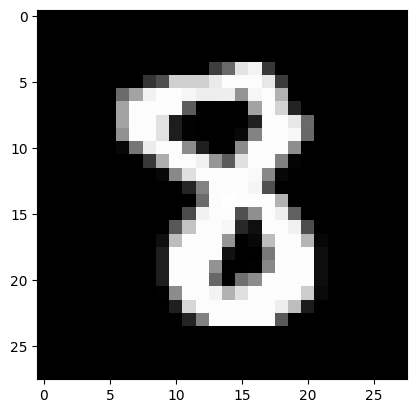

In [167]:
img, label = test_dataset[1893]
plt.imshow(img[0], cmap='gray')
print('Label:', label, 'Predicted:',predict_image(img, model))

In [168]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model, test_loader)
result

{'val_loss': 0.6405437588691711, 'val_acc': 0.859082043170929}

In [169]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0141,  0.0063, -0.0286,  ...,  0.0286,  0.0049, -0.0152],
                      [ 0.0208, -0.0276, -0.0088,  ...,  0.0239, -0.0357, -0.0226],
                      [-0.0161,  0.0150,  0.0013,  ..., -0.0068, -0.0251, -0.0218],
                      ...,
                      [ 0.0231,  0.0210, -0.0160,  ...,  0.0176, -0.0271, -0.0030],
                      [ 0.0201,  0.0091,  0.0273,  ..., -0.0228, -0.0120, -0.0266],
                      [ 0.0123,  0.0288,  0.0166,  ...,  0.0182, -0.0187,  0.0079]])),
             ('linear.bias',
              tensor([-0.0252,  0.0916, -0.0332, -0.0124,  0.0178,  0.0648,  0.0159,  0.0637,
                      -0.1163, -0.0167]))])

In [171]:
model2 = MnistModel()

In [172]:
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0017,  0.0174, -0.0256,  ..., -0.0175, -0.0029,  0.0118],
                      [ 0.0157, -0.0317,  0.0226,  ...,  0.0095,  0.0337,  0.0145],
                      [-0.0146, -0.0194, -0.0010,  ...,  0.0300, -0.0210,  0.0092],
                      ...,
                      [-0.0040,  0.0012,  0.0092,  ...,  0.0314, -0.0175,  0.0078],
                      [-0.0125, -0.0206, -0.0123,  ...,  0.0286, -0.0045, -0.0119],
                      [ 0.0171,  0.0170,  0.0037,  ...,  0.0194, -0.0318, -0.0057]])),
             ('linear.bias',
              tensor([-0.0302,  0.0076, -0.0168,  0.0320,  0.0061,  0.0145,  0.0027,  0.0218,
                      -0.0142, -0.0319]))])

In [173]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model2, test_loader)
result

{'val_loss': 2.307913303375244, 'val_acc': 0.10126952826976776}